<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Machine%20Learning%20Interview%20Prep%20Questions/Unsupervised%20Learning%20Algorithms/Clustering%20Algorithms/Mean%20Shift%20Clustering/mean_shift_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mean Shift Clustering from Scratch (No ML Libraries, No Classes)

In this notebook, we implement **Mean Shift Clustering**, a powerful unsupervised learning algorithm that discovers clusters by shifting points toward the nearest region of high data density.

No `k` required, the algorithm finds the number of clusters automatically.

## What is Mean Shift?

Mean Shift is a **centroid-based** clustering algorithm. It works by:
1. Placing a window (radius = bandwidth) over each point.
2. Shifting each point toward the **mean of its neighbors** within the window.
3. Repeating until all points converge to high-density regions (modes).
4. Grouping nearby modes as clusters.

### Key Parameter:
- **Bandwidth (`radius`)**: The size of the window used to find neighbors.


## Generate Sample Data


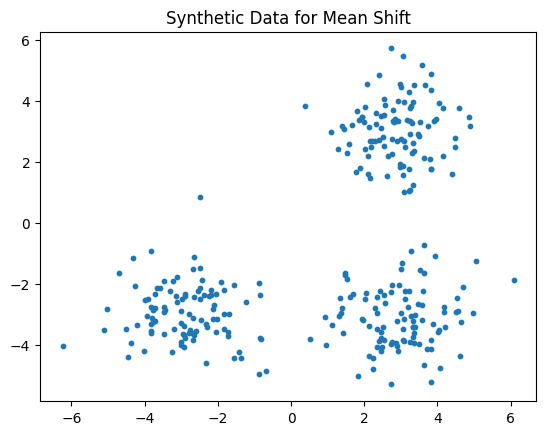

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create synthetic data
np.random.seed(42)
X1 = np.random.randn(100, 2) + np.array([3, 3])
X2 = np.random.randn(100, 2) + np.array([-3, -3])
X3 = np.random.randn(100, 2) + np.array([3, -3])
X = np.vstack((X1, X2, X3))

plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Synthetic Data for Mean Shift")
plt.show()

## Mean Shift Functions

In [2]:
def euclidean(a, b):
    return np.linalg.norm(a - b)

def get_neighbors(X, center, radius):
    return np.array([x for x in X if euclidean(x, center) <= radius])

def shift_point(X, point, radius):
    neighbors = get_neighbors(X, point, radius)
    return np.mean(neighbors, axis=0) if len(neighbors) > 0 else point

## Full Mean Shift Algorithm

In [3]:
def mean_shift(X, radius=2.0, max_iters=100, tolerance=1e-3):
    points = X.copy()
    for i in range(max_iters):
        new_points = np.array([shift_point(X, point, radius) for point in points])
        shifts = np.linalg.norm(new_points - points, axis=1)
        if np.max(shifts) < tolerance:
            break
        points = new_points

    # Round and deduplicate converged points to find unique cluster centers
    rounded = np.round(points, decimals=2)
    unique_modes = []
    for pt in rounded:
        if not any(np.allclose(pt, mode) for mode in unique_modes):
            unique_modes.append(pt)

    # Assign cluster labels
    labels = []
    for pt in rounded:
        for i, mode in enumerate(unique_modes):
            if np.allclose(pt, mode):
                labels.append(i)
                break

    return np.array(labels), np.array(unique_modes)

## Run + Visualize Results

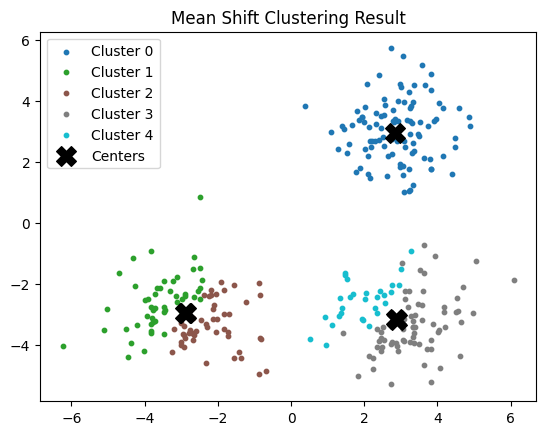

In [4]:
radius = 2.0
labels, centers = mean_shift(X, radius=radius)

# Plot results
colors = plt.cm.tab10(np.linspace(0, 1, len(set(labels))))

for i in range(len(centers)):
    cluster_points = X[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=10, color=colors[i], label=f"Cluster {i}")

plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='X', color='black', label='Centers')
plt.title("Mean Shift Clustering Result")
plt.legend()
plt.show()

## Summary

- Implemented **Mean Shift** clustering from scratch using NumPy
- Learned how to shift points toward denser regions
- No need to specify the number of clusters
- Works well on arbitrarily shaped clusters
